In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
types = pd.read_csv(r'DM_Ass4_Datasets\types.csv', sep=';')
codes = pd.read_csv(r'DM_Ass4_Datasets\codes.csv',sep =';')
transactions = pd.read_csv(r'DM_Ass4_Datasets\transactions.csv', sep =';')
train_set = pd.read_csv(r'DM_Ass4_Datasets\train_set.csv',sep=';')
test_set = pd.read_csv(r'DM_Ass4_Datasets\test_set.csv', sep=';')

In [3]:
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [4]:
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [5]:
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [6]:
train_set.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [7]:
test_set.head()

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250


#  1. Explore the dataset. Do the descriptive statistics.

### Codes

In [8]:
#1 getting information about codes

In [9]:
codes.shape

(184, 2)

In [10]:
codes.info()
codes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


1 categorical and 1 numerical columns. 184 rows

In [11]:
codes.isnull().sum()

code                0
code_description    0
dtype: int64

In [12]:
print('Number of dublicated rows in codes: ', codes.duplicated(keep=False).sum())

Number of dublicated rows in codes:  0


In [13]:
codes.describe()

,code
count,184.000000
mean,6046.793478
std,1470.328104
min,742.000000
25%,5208.250000
50%,5813.500000
75%,7283.000000
max,9402.000000


In [14]:
codes.describe(include=['object'])

,code_description
count,184
unique,184
top,Ортопедические товары
freq,1


### Types

In [15]:
types.shape

(155, 2)

In [16]:
types.info()
types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


1 categorical and 1 numerical columns. 155 rows

In [17]:
types.isnull().sum()

type                0
type_description    0
dtype: int64

In [18]:
print('Number of dublicated rows in types: ', types.duplicated(keep=False).sum() )

Number of dublicated rows in types:  0


In [19]:
types.describe()

,type
count,155.000000
mean,10819.045161
std,80000.258847
min,1000.000000
25%,2385.500000
50%,4040.000000
75%,7027.500000
max,999999.000000


In [20]:
types.describe(include=['object'])

,type_description
count,155
unique,139
top,н/д
freq,13


#  Feature engineering

### types

After studying the dataset, we found out that there are rows in types that do not carry information significant, namely, there were several rows without a description. Therefore, we decided to combine them into one type.

In [21]:
nan_values = types[types['type_description'].str.contains('н/д')]
nan_values

,type,type_description
2,4035,н/д(нет данных)
15,2440,н/д
16,2360,н/д
19,1310,н/д
39,4600,н/д
54,4090,н/д
60,3810,н/д
63,4045,н/д
68,7084,н/д
84,1410,н/д


In [22]:
types.drop(types[types['type_description'].str.contains('н/д')].index, inplace=True)
list_types = nan_values['type'].tolist()
transactions.loc[transactions['type'].isin(list_types), 'type'] = 4035

In [23]:
types = transactions.join(types.set_index('type'), on='type')
# types.drop(['datetime', 'code', 'type', 'sum'], axis = 1, inplace = True)
types

,client_id,datetime,code,type,sum,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ
1,24567813,377 17:20:40,6011,7010,67377.47,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ
3,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ
4,85302434,151 10:34:12,4814,1030,-3368.87,Оплата услуги. Банкоматы
...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,Покупка. POS
130035,28369355,305 11:59:34,4829,2330,-24705.07,Списание с карты по операции “перевода с карты...
130036,40949707,398 21:13:58,5411,1110,-40353.72,Покупка. POS
130037,7174462,409 13:58:14,5411,1010,-25536.06,Покупка. POS


In [24]:
group_type_desc = types.groupby(['client_id'])['type_description'].apply(lambda x: ' '.join([str(i) for i in x])).reset_index()
group_type_desc

,client_id,type_description
0,22899,Наличные. АТМ Плата за получение наличных в ...
1,27914,Взнос наличных через АТМ (в своем тер.банке) О...
2,28753,Покупка. POS Оплата услуги. Банкоматы Покупка...
3,31385,Покупка. POS Выдача наличных в АТМ Выдача нал...
4,38084,Списание с карты на карту по операции <перевод...
...,...,...
8651,99967537,Выдача наличных в АТМ
8652,99984336,Взнос наличных через АТМ (в своем тер.банке) В...
8653,99985917,Выдача наличных в АТМ
8654,99991245,Списание с карты по операции “перевода с карты...


In [25]:
len(group_type_desc)

8656

In [26]:
df1 = group_type_desc.iloc[:2000,:]


In [27]:
lines = df1['type_description'].to_list()

In [28]:
lins = np.array([])
for line in lines:
    lins = np.append(lins, line)

In [29]:
for x in range(len(lins)):
    lins[x] = lins[x].lower()

In [30]:
words_per_text = np.zeros((2000,), dtype=object)
count=0
for line in lins:
    words_per_sentence = np.array([])
    word = re.split('[^абвгдеёжзийклмнопрстуфхцчшщъыьэюя]',line)
    word = [i for i in word if i != '']
    words_per_sentence = np.append(words_per_sentence,word)
    words_per_text[count] = words_per_sentence
    count += 1

In [31]:
unique_words = np.array([])
for sentence in words_per_text:
    unique_words = np.concatenate((unique_words,sentence))
unique_words = np.unique(unique_words)
print(unique_words)

['атм' 'банк' 'банка' 'банке' 'банкоматы' 'без' 'безналичный' 'в'
 'взиманием' 'взимания' 'взнос' 'возврат' 'выдача' 'денежных' 'других'
 'другой' 'другом' 'за' 'зарубеж' 'из' 'карту' 'карты' 'комиссией'
 'комиссии' 'лимита' 'мобильный' 'на' 'наличные' 'наличных' 'овердрафте'
 'одного' 'операции' 'оплата' 'отправителя' 'перевод' 'перевода' 'плата'
 'по' 'покупка' 'покупки' 'получение' 'превыш' 'пределах' 'с' 'своем'
 'списание' 'средств' 'счету' 'тб' 'тер' 'услуги' 'через']


In [32]:
client = df1.groupby('client_id').count()
client['client_id'] = client.index
ln = client['client_id'].to_list()

In [33]:
matrix = pd.DataFrame(columns=unique_words,index=ln)

In [34]:
for line in range(2000):
    for word in range(52):
        count = (words_per_text[line]==unique_words[word]).sum()
        matrix.iloc[line,word] = count

In [35]:
matrix

,атм,банк,банка,банке,банкоматы,без,безналичный,в,взиманием,взимания,...,пределах,с,своем,списание,средств,счету,тб,тер,услуги,через
22899,5,1,3,1,1,0,0,4,1,0,...,1,4,1,0,0,0,0,2,1,3
27914,1,0,0,1,2,0,0,1,0,0,...,0,0,1,0,0,0,0,1,2,2
28753,3,0,2,1,3,0,0,3,0,0,...,2,4,1,2,0,0,0,3,3,3
31385,3,0,0,1,4,0,0,3,0,0,...,0,0,1,0,0,0,0,1,4,2
38084,9,3,1,6,3,3,0,9,0,0,...,1,8,6,4,0,0,0,7,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462825,3,0,0,1,2,0,0,3,0,0,...,0,0,1,0,0,0,0,1,2,1
23468341,4,0,0,0,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,1,0
23478097,6,0,0,0,1,0,0,6,0,0,...,0,0,0,0,0,0,0,0,1,1
23509423,1,8,1,0,7,6,0,2,0,3,...,0,18,0,5,0,0,1,0,7,8


### codes

In [36]:
code = transactions.join(codes.set_index('code'), on='code')
code.drop(['datetime', 'code', 'type', 'sum'], axis = 1, inplace = True)
code

,client_id,code_description
0,96372458,Финансовые институты — снятие наличности автом...
1,24567813,Финансовые институты — снятие наличности автом...
2,21717441,Финансовые институты — снятие наличности автом...
3,14331004,Финансовые институты — снятие наличности автом...
4,85302434,"Звонки с использованием телефонов, считывающих..."
...,...,...
130034,15836839,"Бакалейные магазины, супермаркеты"
130035,28369355,Денежные переводы
130036,40949707,"Бакалейные магазины, супермаркеты"
130037,7174462,"Бакалейные магазины, супермаркеты"


In [37]:
group_code_desc = code.groupby(['client_id'])['code_description'].apply(lambda x: ' '.join([str(i) for i in x])).reset_index()
group_code_desc

,client_id,code_description
0,22899,Финансовые институты — снятие наличности автом...
1,27914,Финансовые институты — снятие наличности автом...
2,28753,Магазины спорттоваров Звонки с использованием ...
3,31385,"Бакалейные магазины, супермаркеты Финансовые и..."
4,38084,Денежные переводы Товары для дома Финансовые и...
...,...,...
8651,99967537,Финансовые институты — снятие наличности автом...
8652,99984336,Финансовые институты — снятие наличности автом...
8653,99985917,Финансовые институты — снятие наличности автом...
8654,99991245,Денежные переводы Различные продовольственные ...


In [38]:
ds1 = group_code_desc.iloc[:2000,:]


In [39]:
lines = ds1['code_description'].to_list()

In [40]:
lins = np.array([])
for line in lines:
    lins = np.append(lins, line)

In [41]:
for x in range(len(lins)):
    lins[x] = lins[x].lower()

In [42]:
words_per_text = np.zeros((2000,), dtype=object)
count=0
for line in lins:
    words_per_sentence = np.array([])
    word = re.split('[^абвгдеёжзийклмнопрстуфхцчшщъыьэюя]',line)
    word = [i for i in word if i != '']
    words_per_sentence = np.append(words_per_sentence,word)
    words_per_text[count] = words_per_sentence
    count += 1

In [43]:
unique_words = np.array([])
for sentence in words_per_text:
    unique_words = np.concatenate((unique_words,sentence))
unique_words = np.unique(unique_words)
print(unique_words)

['авиакомпании' 'авиалинии' 'автогрузоперевозки' 'автозапчасти'
 'автоматизированные' 'автоматически' 'автоматов' 'автомобилей'
 'автомойки' 'автотранспортным' 'автошины' 'агентства' 'агентство'
 'азартным' 'аксессуаров' 'аксессуары' 'алкогольных' 'аптеки'
 'ассортиментом' 'ассоциации' 'аттракционы' 'базы' 'бакалейные' 'бары'
 'бассейны' 'бензин' 'бензозаправки' 'беспошлинные' 'бизнес'
 'благотворительные' 'блюд' 'более' 'больницы' 'боулинг' 'братские'
 'брокеры' 'бронирования' 'будущего' 'булочные' 'бумага' 'бумаги'
 'бытовое' 'бытовые' 'бытовых' 'в' 'валюта' 'веломагазины' 'верховой'
 'ветеринарные' 'видеоигр' 'видеопрокат' 'вино' 'включая' 'вода'
 'водопровода' 'воздуху' 'врачи' 'вручную' 'всей' 'входящий' 'вынос'
 'выращивания' 'газ' 'газеты' 'газонами' 'галереи' 'гаражи' 'гардины'
 'гольфа' 'горючее' 'готовые' 'гражданские' 'грузов' 'грузовиков'
 'грузовой' 'дальные' 'данных' 'дантисты' 'дело' 'денежные' 'детская'
 'дизайн' 'дилеры' 'дискотеки' 'длительного' 'для' 'доктора' 'дома'

In [44]:
client = ds1.groupby('client_id').count()
client['client_id'] = client.index
list_client = client['client_id'].to_list()

In [45]:
matrix2 = pd.DataFrame(columns=unique_words,index=list_client)

for line in range(2000):
    for word in range(426):
        count = (words_per_text[line]==unique_words[word]).sum()
        matrix2.iloc[line,word] = count

In [46]:
matrix2

,авиакомпании,авиалинии,автогрузоперевозки,автозапчасти,автоматизированные,автоматически,автоматов,автомобилей,автомойки,автотранспортным,...,шоу,штрафы,экскурсий,электрические,электричество,электрички,электронного,электрооборудования,ювелирные,ювелирных
22899,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27914,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28753,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31385,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38084,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462825,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23468341,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23478097,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23509423,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Hierarhical clustering

Find similar transactions by cosine distance

In [56]:
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as model
from sklearn.cluster import AgglomerativeClustering


### types

In [48]:
dist_condensed = pdist(matrix.values, 'cosine')
print("Pairwise distances between observations in n-dimensional space:\n", dist_condensed)

Pairwise distances between observations in n-dimensional space:
 [0.47062608 0.28035695 0.4290599  ... 0.87936475 0.55752533 0.34266894]


In [51]:
# converting vector-form distance to square form distance
distance_matrix = squareform(dist_condensed)
print(distance_matrix)

[[0.         0.47062608 0.28035695 ... 0.44345031 0.40532407 0.39482658]
 [0.47062608 0.         0.46610396 ... 0.47477427 0.70062052 0.33681237]
 [0.28035695 0.46610396 0.         ... 0.67564424 0.24726092 0.22027066]
 ...
 [0.44345031 0.47477427 0.67564424 ... 0.         0.87936475 0.55752533]
 [0.40532407 0.70062052 0.24726092 ... 0.87936475 0.         0.34266894]
 [0.39482658 0.33681237 0.22027066 ... 0.55752533 0.34266894 0.        ]]


In [52]:
dist = pd.DataFrame(distance_matrix, columns=matrix.index.values, index=matrix.index.values)
dist

,22899,27914,28753,31385,38084,42096,49793,50940,52926,53395,...,23410682,23414531,23436847,23446972,23447115,23462825,23468341,23478097,23509423,23513295
22899,0.000000,0.470626,0.280357,0.429060,0.205256,0.234729,0.442461,0.455251,0.283656,0.226930,...,0.518395,0.481679,0.226557,0.376346,0.250219,0.359236,0.463747,0.443450,0.405324,0.394827
27914,0.470626,0.000000,0.466104,0.176209,0.389023,0.580179,0.264095,0.639698,0.365155,0.731972,...,0.473603,0.628609,0.454079,0.746160,0.712194,0.237526,0.597464,0.474774,0.700621,0.336812
28753,0.280357,0.466104,0.000000,0.292515,0.140450,0.384347,0.261268,0.624521,0.254625,0.361558,...,0.324300,0.741977,0.453248,0.200102,0.301752,0.326244,0.426148,0.675644,0.247261,0.220271
31385,0.429060,0.176209,0.292515,0.000000,0.329042,0.346266,0.015889,0.363214,0.091200,0.764781,...,0.084634,0.456786,0.328542,0.485623,0.597750,0.040660,0.197132,0.345589,0.594549,0.328454
38084,0.205256,0.389023,0.140450,0.329042,0.000000,0.288867,0.330869,0.480916,0.216956,0.372946,...,0.432539,0.552786,0.231639,0.177163,0.202352,0.289181,0.411414,0.495541,0.258562,0.359378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462825,0.359236,0.237526,0.326244,0.040660,0.289181,0.199428,0.047667,0.196884,0.055814,0.694112,...,0.098873,0.271507,0.176959,0.502085,0.571178,0.000000,0.112532,0.198699,0.661044,0.381409
23468341,0.463747,0.597464,0.426148,0.197132,0.411414,0.140769,0.163251,0.091886,0.089764,0.772448,...,0.078262,0.211737,0.196812,0.444396,0.569006,0.112532,0.000000,0.202628,0.715069,0.607498
23478097,0.443450,0.474774,0.675644,0.345589,0.495541,0.139060,0.399519,0.047230,0.251343,0.705154,...,0.376390,0.017907,0.118083,0.714720,0.648219,0.198699,0.202628,0.000000,0.879365,0.557525
23509423,0.405324,0.700621,0.247261,0.594549,0.258562,0.654049,0.587097,0.863454,0.443429,0.468109,...,0.608270,0.936023,0.634093,0.078452,0.108036,0.661044,0.715069,0.879365,0.000000,0.342669


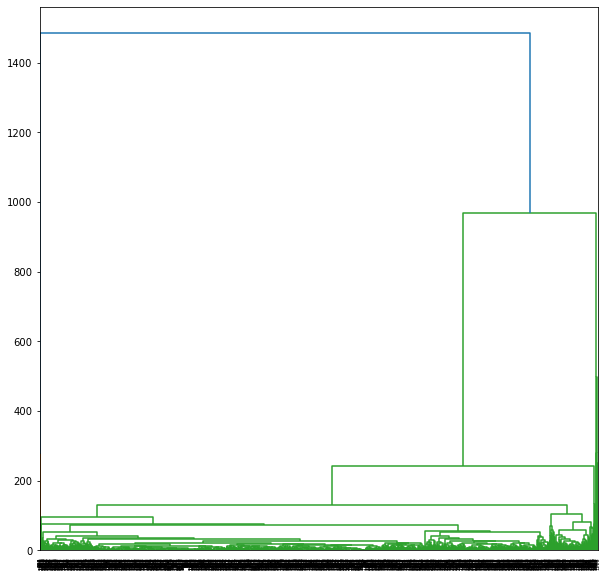

In [54]:
fig = plt.figure(figsize=(10, 10))
dend_max = model.dendrogram(model.linkage(matrix, method='complete'))

In [57]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
arr=cluster.fit_predict(matrix)
arr

array([3, 3, 3, ..., 3, 4, 3], dtype=int64)

In [58]:
f_w = pd.concat([df1, pd.Series(arr)], axis=1)
f_w = f_w.set_index('client_id')
f_w = f_w.rename(columns={0: "cluster"})
f_w

,type_description,cluster
client_id,,
22899,Наличные. АТМ Плата за получение наличных в ...,3
27914,Взнос наличных через АТМ (в своем тер.банке) О...,3
28753,Покупка. POS Оплата услуги. Банкоматы Покупка...,3
31385,Покупка. POS Выдача наличных в АТМ Выдача нал...,3
38084,Списание с карты на карту по операции <перевод...,4
...,...,...
23462825,Покупка. POS Выдача наличных в АТМ Выдача нал...,3
23468341,Выдача наличных в АТМ Выдача наличных в АТМ Вы...,3
23478097,Выдача наличных в АТМ Выдача наличных в АТМ Вы...,3


In [59]:
f_w_0=f_w.loc[f_w['cluster'] == 0]
f_w_0

,type_description,cluster
client_id,,
370258,Перевод на карту (с карты) через Мобильный бан...,0
815836,Списание с карты на карту по операции <перевод...,0
890531,Покупка. Зарубеж. Списание с карты на карту п...,0
1133595,Перевод на карту (с карты) через АТМ (в предел...,0
1877761,Выдача наличных в АТМ банка (в других ТБ) Плат...,0
2354592,Выдача наличных в АТМ Перевод на карту (с карт...,0
2420841,Перевод на карту (с карты) через Мобильный бан...,0
2444292,Выдача наличных в АТМ Списание с карты на карт...,0
3568140,Списание с карты на карту по операции <перевод...,0


In [60]:
uni_f_w_0=f_w_0['type_description'].unique()
uni_f_w_0

array(['Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) Плата за получение наличных в АТМ банка (в других ТБ) Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) Покупка. POS  Списание с карты по операции “перевода с карты на карту” через АТМ (в пределах одного тер.банка) Покупка. POS  Покупка. POS  Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя) Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии) Выдача наличных в АТМ Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии) Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии) Взнос наличных через POS Оплата услуги. Б

In [61]:
f_w_0=f_w.loc[f_w['cluster'] == 0]
uni_f_w_0=pd.Series(f_w_0['type_description'].unique())
uni_f_w_0

0     Перевод на карту (с карты) через Мобильный бан...
1     Списание с карты на карту по операции <перевод...
2     Покупка. Зарубеж.  Списание с карты на карту п...
3     Перевод на карту (с карты) через АТМ (в предел...
4     Выдача наличных в АТМ банка (в других ТБ) Плат...
5     Выдача наличных в АТМ Перевод на карту (с карт...
6     Перевод на карту (с карты) через Мобильный бан...
7     Выдача наличных в АТМ Списание с карты на карт...
8     Списание с карты на карту по операции <перевод...
9     Перевод на карту (с карты) через Мобильный бан...
10    Перевод на карту (с карты) через Мобильный бан...
11    Покупка. POS  Списание с карты на карту по опе...
12    Покупка. POS  Оплата услуги. Банкоматы Покупка...
13    Перевод на карту (с карты) через АТМ (в предел...
14    Перевод на карту (с карты) через Мобильный бан...
15    Перевод на карту (с карты) через АТМ (в предел...
16    Перевод на карту (с карты) через Мобильный бан...
17    Перевод на карту (с карты) через Мобильный

In [62]:
f_w_1=f_w.loc[f_w['cluster'] == 1]
uni_f_w_1=pd.Series(f_w_1['type_description'].unique())
uni_f_w_1

0    Списание с карты на карту по операции <перевод...
1    Перевод на карту (с карты) через Мобильный бан...
2    Списание с карты на карту по операции <перевод...
3    Перевод на карту (с карты) через Мобильный бан...
4    Перевод на карту (с карты) через Мобильный бан...
5    Перевод на карту (с карты) через Мобильный бан...
dtype: object

In [63]:
f_w_2=f_w.loc[f_w['cluster'] == 2]
uni_f_w_2=pd.Series(f_w_2['type_description'].unique())
uni_f_w_2

0    Перевод на карту (с карты) через Мобильный бан...
1    Перевод на карту (с карты) через АТМ (в предел...
dtype: object

In [64]:
f_w_3=f_w.loc[f_w['cluster'] == 3]
uni_f_w_3=pd.Series(f_w_3['type_description'].unique())
uni_f_w_3

0       Наличные.   АТМ Плата за получение наличных в ...
1       Взнос наличных через АТМ (в своем тер.банке) О...
2       Покупка. POS  Оплата услуги. Банкоматы Покупка...
3       Покупка. POS  Выдача наличных в АТМ Выдача нал...
4       Выдача наличных в АТМ Плата за получение налич...
                              ...                        
1383    Перевод на карту (с карты) через Мобильный бан...
1384    Покупка. POS  Выдача наличных в АТМ Выдача нал...
1385    Выдача наличных в АТМ Выдача наличных в АТМ Вы...
1386    Выдача наличных в АТМ Выдача наличных в АТМ Вы...
1387    Оплата услуги. Банкоматы Выдача наличных в АТМ...
Length: 1388, dtype: object

In [65]:
f_w_4=f_w.loc[f_w['cluster'] == 4]
uni_f_w_4=pd.Series(f_w_4['type_description'].unique())
uni_f_w_4

0      Списание с карты на карту по операции <перевод...
1      Оплата услуги. Банкоматы Выдача наличных в АТМ...
2      Покупка. Зарубеж.  Списание с карты на карту п...
3      Покупка. POS  Покупка. POS  Перевод на карту (...
4      Перевод на карту (с карты) через Мобильный бан...
                             ...                        
352    Перевод на карту (с карты) через Мобильный бан...
353    Выдача наличных в АТМ Выдача наличных в АТМ Оп...
354    Выдача наличных в АТМ Покупка. POS  Покупка. P...
355    Покупка. POS  Выдача наличных в АТМ Покупка. P...
356    Покупка. POS  Списание с карты на карту по опе...
Length: 357, dtype: object

In [66]:
f_w_5=f_w.loc[f_w['cluster'] == 5]
uni_f_w_5=pd.Series(f_w_5['type_description'].unique())
uni_f_w_5

0    Выдача наличных в АТМ Выдача наличных в АТМ Пе...
dtype: object

### codes

In [67]:
dist_condensed2 = pdist(matrix2.values, 'cosine')
print("Pairwise distances between observations in n-dimensional space:\n", dist_condensed2)

Pairwise distances between observations in n-dimensional space:
 [0.24639571 0.63532217 0.32133728 ... 0.55238352 0.57566579 0.15167358]


In [68]:
distance_matrix2 = squareform(dist_condensed2)
print(distance_matrix2)

[[0.         0.24639571 0.63532217 ... 0.0247773  0.50636948 0.55978947]
 [0.24639571 0.         0.25545462 ... 0.26716502 0.1940861  0.10124309]
 [0.63532217 0.25545462 0.         ... 0.64847438 0.12355955 0.14791408]
 ...
 [0.0247773  0.26716502 0.64847438 ... 0.         0.55238352 0.57566579]
 [0.50636948 0.1940861  0.12355955 ... 0.55238352 0.         0.15167358]
 [0.55978947 0.10124309 0.14791408 ... 0.57566579 0.15167358 0.        ]]


In [69]:
dist2 = pd.DataFrame(distance_matrix2, columns=matrix2.index.values, index=matrix2.index.values)
dist2

,22899,27914,28753,31385,38084,42096,49793,50940,52926,53395,...,23410682,23414531,23436847,23446972,23447115,23462825,23468341,23478097,23509423,23513295
22899,0.000000,0.246396,0.635322,0.321337,0.180969,0.078045,0.681303,0.122317,0.332978,0.126020,...,0.418674,0.058790,0.065733,0.533837,0.140038,0.201031,0.299406,0.024777,0.506369,0.559789
27914,0.246396,0.000000,0.255455,0.118881,0.248526,0.407444,0.540513,0.446612,0.308502,0.406558,...,0.250344,0.406558,0.405628,0.515080,0.353247,0.120422,0.422573,0.267165,0.194086,0.101243
28753,0.635322,0.255455,0.000000,0.208901,0.356132,0.689475,0.502511,0.690310,0.380832,0.822877,...,0.234216,0.778596,0.722812,0.404529,0.543285,0.334141,0.480386,0.648474,0.123560,0.147914
31385,0.321337,0.118881,0.208901,0.000000,0.126662,0.363204,0.472576,0.322777,0.271239,0.506156,...,0.065015,0.448057,0.367181,0.334676,0.250949,0.119303,0.165597,0.333320,0.104418,0.200324
38084,0.180969,0.248526,0.356132,0.126662,0.000000,0.139551,0.567797,0.129648,0.288873,0.371218,...,0.185075,0.214023,0.156211,0.329082,0.115820,0.146942,0.112106,0.166171,0.245464,0.401325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462825,0.201031,0.120422,0.334141,0.119303,0.146942,0.256682,0.544707,0.253653,0.281838,0.417914,...,0.199962,0.272393,0.253035,0.434328,0.239730,0.000000,0.243887,0.187838,0.261127,0.261048
23468341,0.299406,0.422573,0.480386,0.165597,0.112106,0.188472,0.574910,0.101734,0.333734,0.439544,...,0.147425,0.299431,0.179927,0.304465,0.125120,0.243887,0.000000,0.277003,0.335443,0.616168
23478097,0.024777,0.267165,0.648474,0.333320,0.166171,0.052294,0.697572,0.084751,0.338136,0.162842,...,0.426810,0.018505,0.035038,0.551144,0.141802,0.187838,0.277003,0.000000,0.552384,0.575666
23509423,0.506369,0.194086,0.123560,0.104418,0.245464,0.575475,0.508814,0.557715,0.382939,0.653398,...,0.138277,0.689882,0.600326,0.346466,0.396807,0.261127,0.335443,0.552384,0.000000,0.151674


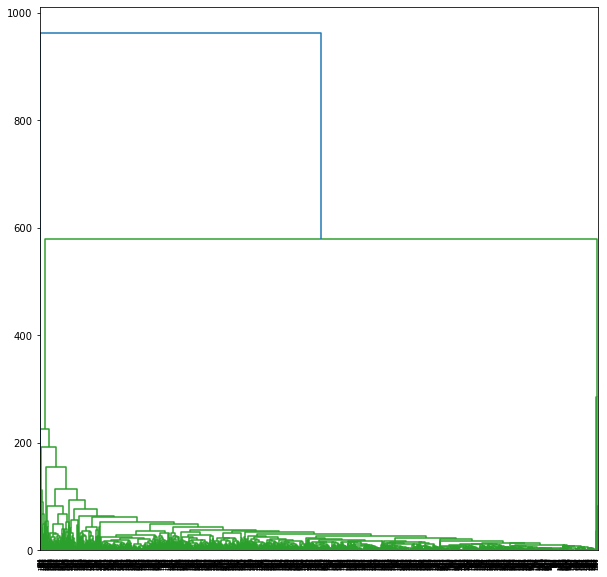

In [70]:
fig = plt.figure(figsize=(10, 10))
dend_max2 = model.dendrogram(model.linkage(matrix2, method='complete'))

In [71]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
arr2=cluster.fit_predict(matrix2)
arr2

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [72]:
f_w_c = pd.concat([ds1, pd.Series(arr2)], axis=1)
f_w_c = f_w_c.set_index('client_id')
f_w_c = f_w_c.rename(columns={0: "cluster"})
f_w_c

,code_description,cluster
client_id,,
22899,Финансовые институты — снятие наличности автом...,1
27914,Финансовые институты — снятие наличности автом...,2
28753,Магазины спорттоваров Звонки с использованием ...,2
31385,"Бакалейные магазины, супермаркеты Финансовые и...",2
38084,Денежные переводы Товары для дома Финансовые и...,1
...,...,...
23462825,"Бакалейные магазины, супермаркеты Финансовые и...",2
23468341,Финансовые институты — снятие наличности автом...,2
23478097,Финансовые институты — снятие наличности автом...,1


In [73]:
f_w_c_0=f_w_c.loc[f_w_c['cluster'] == 0]
f_w_c_0

,code_description,cluster
client_id,,
450407,Денежные переводы Денежные переводы Финансовые...,0
5009599,Финансовые институты — снятие наличности вручн...,0
8014460,Финансовые институты — снятие наличности вручн...,0
13182172,Финансовые институты — снятие наличности вручн...,0
18889791,Финансовые институты — снятие наличности вручн...,0
19805868,Финансовые институты — снятие наличности автом...,0


In [74]:
f_w_c_1=f_w_c.loc[f_w_c['cluster'] == 1]
f_w_c_1

,code_description,cluster
client_id,,
22899,Финансовые институты — снятие наличности автом...,1
38084,Денежные переводы Товары для дома Финансовые и...,1
42096,Финансовые институты — снятие наличности автом...,1
52926,"Звонки с использованием телефонов, считывающих...",1
70680,Финансовые институты — снятие наличности автом...,1
...,...,...
23190416,Финансовые институты — снятие наличности вручн...,1
23378995,"Бакалейные магазины, супермаркеты Финансовые и...",1
23436847,Финансовые институты — снятие наличности вручн...,1


In [75]:
f_w_c_2=f_w_c.loc[f_w_c['cluster'] == 2]
f_w_c_2

,code_description,cluster
client_id,,
27914,Финансовые институты — снятие наличности автом...,2
28753,Магазины спорттоваров Звонки с использованием ...,2
31385,"Бакалейные магазины, супермаркеты Финансовые и...",2
50940,"Бакалейные магазины, супермаркеты Финансовые и...",2
53395,Финансовые институты — снятие наличности вручную,2
...,...,...
23414531,Финансовые институты — снятие наличности автом...,2
23462825,"Бакалейные магазины, супермаркеты Финансовые и...",2
23468341,Финансовые институты — снятие наличности автом...,2


In [76]:
f_w_c_3=f_w_c.loc[f_w_c['cluster'] == 3]
f_w_c_3

,code_description,cluster
client_id,,
2172915,Финансовые институты — снятие наличности автом...,3
2354592,Финансовые институты — снятие наличности автом...,3
5373287,Финансовые институты — снятие наличности автом...,3
5546147,Денежные переводы Денежные переводы Финансовые...,3
5617583,"Бакалейные магазины, супермаркеты Денежные пер...",3
6342326,Финансовые институты — снятие наличности вручн...,3
6506523,Финансовые институты — снятие наличности вручн...,3
9044015,Финансовые институты — снятие наличности вручн...,3
9106768,Финансовые институты — снятие наличности автом...,3


In [77]:
f_w_c_4=f_w_c.loc[f_w_c['cluster'] == 4]
f_w_c_4

,code_description,cluster
client_id,,
49793,Финансовые институты — снятие наличности автом...,4
340557,"Различные продовольственные магазины — рынки, ...",4
364063,"Бакалейные магазины, супермаркеты Бакалейные м...",4
570018,"Бакалейные магазины, супермаркеты Финансовые и...",4
772334,"Различные продовольственные магазины — рынки, ...",4
...,...,...
22613150,Финансовые институты — снятие наличности вручн...,4
22771802,"Магазины офисных, школьных принадлежностей, ка...",4
23136235,Универсальные магазины Различные продовольстве...,4


In [78]:
f_w_c_5=f_w_c.loc[f_w_c['cluster'] == 5]
f_w_c_5

,code_description,cluster
client_id,,
10004871,Финансовые институты — снятие наличности вручн...,5
11701078,Финансовые институты — снятие наличности вручн...,5
